# TASK 1

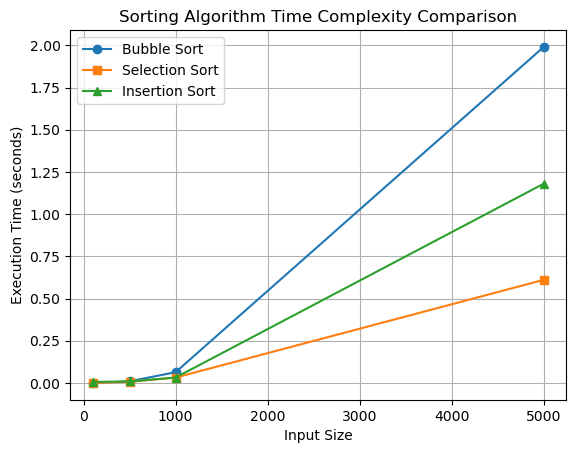

In [2]:
import time
import matplotlib.pyplot as plt

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

def insertion_sort(arr):
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

def measure_time(sort_function, arr):
    start_time = time.time()
    sort_function(arr.copy())  
    return time.time() - start_time

sizes = [100, 500, 1000, 5000]
bubble_times, selection_times, insertion_times = [], [], []

for size in sizes:
    arr = list(range(size, 0, -1)) 
    bubble_times.append(measure_time(bubble_sort, arr))
    selection_times.append(measure_time(selection_sort, arr))
    insertion_times.append(measure_time(insertion_sort, arr))

plt.plot(sizes, bubble_times, label="Bubble Sort", marker="o")
plt.plot(sizes, selection_times, label="Selection Sort", marker="s")
plt.plot(sizes, insertion_times, label="Insertion Sort", marker="^")
plt.xlabel("Input Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Sorting Algorithm Time Complexity Comparison")
plt.legend()
plt.grid()
plt.show()

# TASK 2

In [5]:
import random
import time

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2] 
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

In [7]:
def generate_random_list(size):
    return [random.randint(0, 100000) for _ in range(size)]

def compare_performance():
    sizes = [1000, 5000, 10000]
    for size in sizes:
        arr = generate_random_list(size)
        
        start_time = time.time()
        quick_sort(arr)
        quick_time = time.time() - start_time
        
        start_time = time.time()
        merge_sort(arr)
        merge_time = time.time() - start_time
        
        print(f"Size: {size} | Quick Sort Time: {quick_time:.6f} sec | Merge Sort Time: {merge_time:.6f} sec")

compare_performance()

Size: 1000 | Quick Sort Time: 0.002989 sec | Merge Sort Time: 0.004001 sec
Size: 5000 | Quick Sort Time: 0.010891 sec | Merge Sort Time: 0.013353 sec
Size: 10000 | Quick Sort Time: 0.021264 sec | Merge Sort Time: 0.027729 sec


# TASK 3

In [10]:
import random
import time

def heapify(arr, n, i):
    largest = i  
    left = 2 * i + 1  
    right = 2 * i + 2 

    if left < n and arr[left] > arr[largest]:
        largest = left

    if right < n and arr[right] > arr[largest]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i] 
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

    
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  
        heapify(arr, i, 0)

    return arr

In [12]:
def counting_sort(arr):
    if not arr:
        return arr
    
    max_val = max(arr)
    count = [0] * (max_val + 1)
    output = [0] * len(arr)

    for num in arr:
        count[num] += 1

    for i in range(1, len(count)):
        count[i] += count[i - 1]

    for num in reversed(arr):
        output[count[num] - 1] = num
        count[num] -= 1

    return output

In [14]:
def generate_random_list(size, limit=1000):
    return [random.randint(0, limit) for _ in range(size)]

def compare_performance():
    sizes = [1000, 5000, 10000]

    for size in sizes:
        arr = generate_random_list(size)

        start_time = time.time()
        heap_sort(arr.copy()) 
        heap_time = time.time() - start_time

       
        start_time = time.time()
        counting_sort(arr.copy()) 
        counting_time = time.time() - start_time

        print(f"Size: {size} | Heap Sort Time: {heap_time:.6f} sec | Counting Sort Time: {counting_time:.6f} sec")

compare_performance()

Size: 1000 | Heap Sort Time: 0.005112 sec | Counting Sort Time: 0.001277 sec
Size: 5000 | Heap Sort Time: 0.019380 sec | Counting Sort Time: 0.001000 sec
Size: 10000 | Heap Sort Time: 0.032061 sec | Counting Sort Time: 0.000000 sec
